In [40]:
import polars as pl

dfIris = pl.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv")

In [41]:
dfIris

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""virginica"""
6.3,2.5,5.0,1.9,"""virginica"""
6.5,3.0,5.2,2.0,"""virginica"""


In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocess your data
# Assuming the last column is the target variable
X = dfIris[:, :4]  # Features
y = dfIris[:, 4]   # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [43]:
clf.predict([[110, 110, 110, 50]])

/Users/tomaszmaczka/Documents/prz/msi_lectute_2024/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype='<U10')

In [44]:
from sklearn.tree import export_text

tree_text = export_text(clf, feature_names=dfIris.columns[:4])
print(tree_text)

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- class: versicolor
|   |--- petal_length >  4.75
|   |   |--- class: virginica



[Text(0.4, 0.8333333333333334, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal_length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

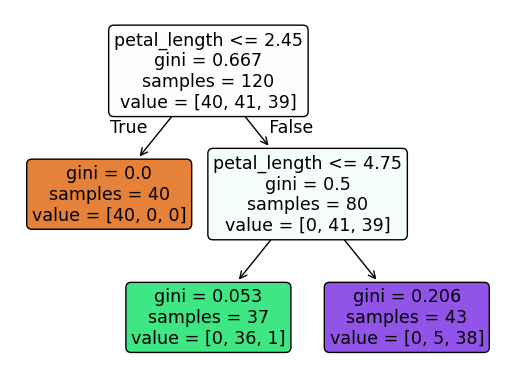

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plot_tree(clf, 
          feature_names=dfIris.columns[:4], 
          filled=True, 
          rounded=True)